### Data load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('./titanic_train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부, 0 = 사망, 1 = 생존
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex: 탑승자 성별
- name: 탑승자 이름
- Age: 탑승자 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- parch: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

### EDA

In [5]:
# null값 확인하기
titanic.isnull().sum()

# Age, Cabin, Embarked에 null값이 존재

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(titanic['Age'].value_counts())
print(titanic['Cabin'].value_counts())
print(titanic['Embarked'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


**Null값 대체**

In [9]:
# Age는 평균 값으로 대체
# Cabin, Embarked는 'N'으로 넣기
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)

print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 주요 칼럼 EDA

In [13]:
# object 칼럼 보기
print(titanic.dtypes[titanic.dtypes == 'object'].index.to_list())

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [14]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
titanic.dtypes[titanic.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [16]:
# 위에서 나온 결과를 보면 시리얼 형태로 나오는데 여기서 인덱스만 즉 칼럼명만 뽑고 싶은 것임. 
# 그래서 .index.to_list() 인덱스를 리스트 형태로 보여주세요
titanic.dtypes[titanic.dtypes == 'object'].index


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [17]:
titanic.dtypes[titanic.dtypes == 'object'].index.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [20]:
# object 컬럼들 분포보기
# name은 제외, ticket number는 고유한 값으로 제외
print('Sex 분포 \n', titanic['Sex'].value_counts())
print('Cabin 분포 \n',  titanic['Cabin'].value_counts()) # Null 값이 제일 많음
print('Embarked 분포 \n', titanic['Embarked'].value_counts())

Sex 분포 
 male      577
female    314
Name: Sex, dtype: int64
Cabin 분포 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 분포 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
# Cabin의 첫번째 영어만 따서 저장하기
titanic['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [22]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [24]:
# 남여에 따른 생존 비율 확인
titanic.groupby(['Sex', 'Survived'])['Sex'].count() # Sex를 기준으로 Survived 의 분포를 보여주기

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [25]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count() # 오잉 똑같네

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [26]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

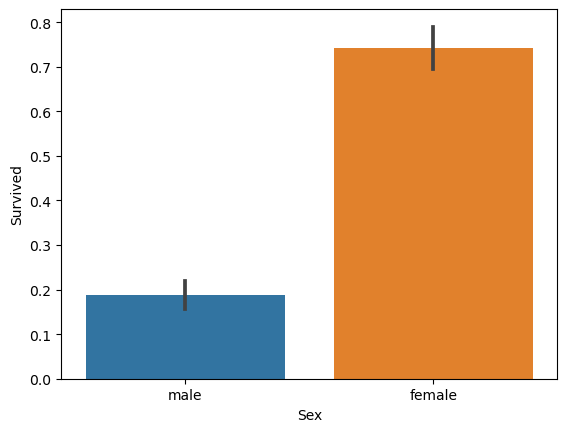

In [29]:
# Sex에 대한 Survived 비율 시각화
sns.barplot(x=titanic['Sex'], y=titanic['Survived'])
# sns.barplot(data=titanic, x='Sex', y= 'Survived') # 이렇게도 시각화 가능
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

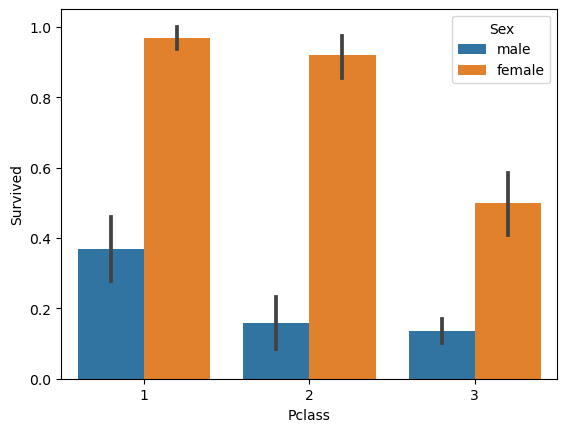

In [31]:
# class에 따른 survived 비율
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex')
# hue로 그룹화 시킬 수 있다.

# 결국 1등급의 female이 가장 높은 생존율이 있었다.

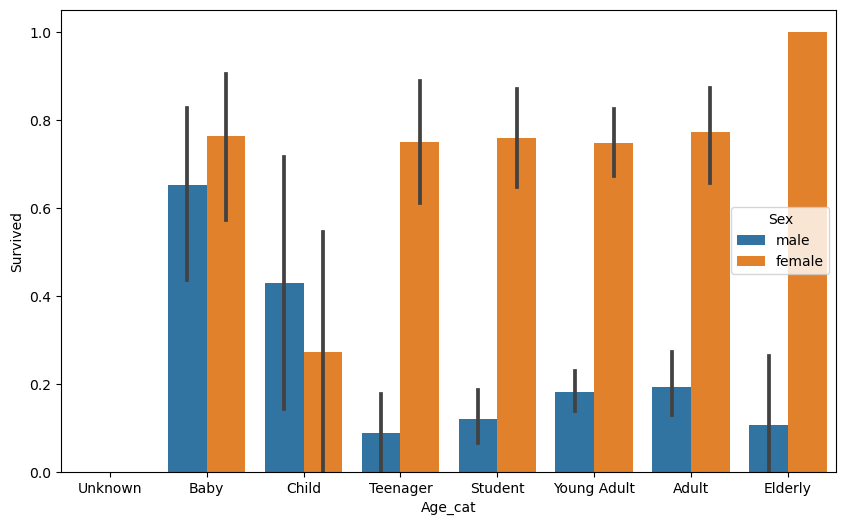

In [38]:
# 나이에 따라서 카테고리로 분류하기
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'

    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic['Age_cat'] = titanic['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic, order= group_names) 
# order=group_name을 넣어야 값이 없는 Unknown 카테고리도 나옴 
plt.show()


In [41]:
titanic.drop('Age_cat', axis=1, inplace=True) # titanic 데이터 다시 돌려놓기

### LabelEncoder로 데이터 인코딩 하기

In [42]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic = encode_features(titanic)
titanic.head(3)

# Cabin, Sex, Embarked가 모두 숫자로 카테고리화 되어있는 것을 볼 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


### 결론: 전처리 전체를 함수로 정의

In [43]:
from sklearn.preprocessing import LabelEncoder

# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거 (PassengerId, Name, Ticket)

def drop_feature(df):
    df.drop('PassengerId', axis=1, inplace=True)
    df.drop('Name', axis=1, inplace=True)
    df.drop('Ticket', axis=1, inplace=True)

    return df

# 레이블 인코딩 수행
def encode_features(dataDF):
    dataDF['Cabin'] = dataDF['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = encode_features(df)
    return df

In [44]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1, inplace=False)

X_feature = transform_features(X)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=11)
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression(solver='liblinear')

dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('RandomForestClassifier accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('LogisticRegression accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))


DecisionTreeClassifier accuracy: 0.788
RandomForestClassifier accuracy: 0.855
LogisticRegression accuracy: 0.866


In [49]:
# 교차 검증 적용
from sklearn.model_selection import KFold

def exec_kfold(clf, fold=5):
    kfold = KFold(n_splits=fold)
    scores = []

    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_feature)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_feature.values[train_index], X_feature.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt , fold=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_feature, y, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
